**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identification

Name: Matsuru Hoshi<br/>
Student Number: 300228879

Name: Yu-Chen Lee<br/>
Student Number: 300240688



### TO DO:
✅ Data Exploration (matsuru)\
✅ Data Pre-Processing 5 (matsuru)\
✅ Data Pre-Processing 6 (matsuru)\
✅ Model Development & Evaluation 7 (renny)\
✅ Model Development & Evaluation 8 (renny)\
🟥 Hyperparameter Optimization (both)\
🟥 Analysis of Results (both)\
🟥 Documentation & Resources (both)

## Importing Important Libaries

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report


# 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [2]:
url = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv'

diabetes_df = pd.read_csv(url)

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

In [3]:
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#### Identifiying values of ambiguous attributes
- Gender
- Hypertension
- Heart Disease
- Smoking History
- Diabetes

The following cells counts the number of recurrent values in each attribute.

We can expect 3 values for the `gender` attribute.

In [6]:
diabetes_df.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

For `heart_disease` and `hypertension`, we have binary values.

In [7]:
diabetes_df.heart_disease.value_counts(), diabetes_df.hypertension.value_counts()

(heart_disease
 0    96058
 1     3942
 Name: count, dtype: int64,
 hypertension
 0    92515
 1     7485
 Name: count, dtype: int64)

For `smoking_history`, we have a finite (5) number of values.

In [8]:
diabetes_df.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

#### Identifying the target variable

We have identified that the `diabetes` column/attribute is *binary*, and thus can be used in a binary classification task. From this, we can also conclude that it must represent whether the patient has diabetes (1 or 0 ≈ yes or no).

Thus, we can safely say that `diabetes` will be our target variable.

2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

#### Gender Feature Analysis

Let's plot a histogram.

<Axes: >

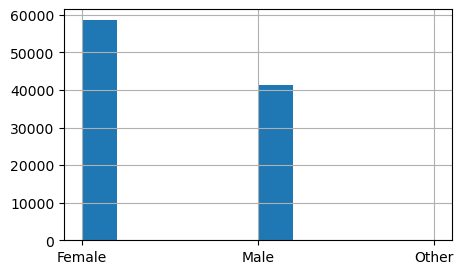

In [9]:
diabetes_df.gender.hist(figsize=(5,3))

It appears there are slightly more women than men, a little more than the world average. "Other" is not large enough to appear on the graph.



Let's plot `gender` against the target variable.

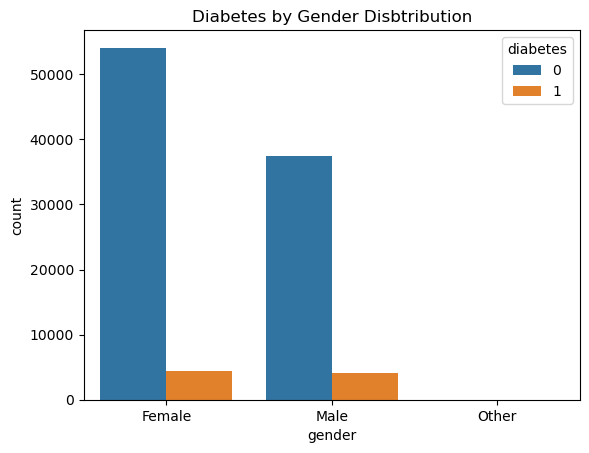

In [10]:
sns.countplot(diabetes_df, x="gender", hue="diabetes")
plt.title('Diabetes by Gender Disbtribution')
plt.show()

It is not entirely clear if this is significant, but it appears the diabetes rate among men is higher than women.

#### Age Attribute Analysis

Let us take a look the histogram for age.

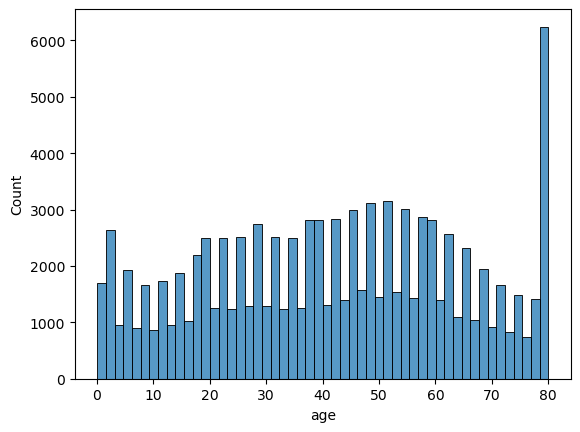

In [11]:
sns.histplot(diabetes_df, x="age")
plt.show()

It appears there is a very high count of diabetes with people near 80 years old. Children under 5 also appear to peak in diabetes cases, nearly as much as the next highest peak around the 50 year olds.

We will plot a boxplot for the age attribute separating by gender.

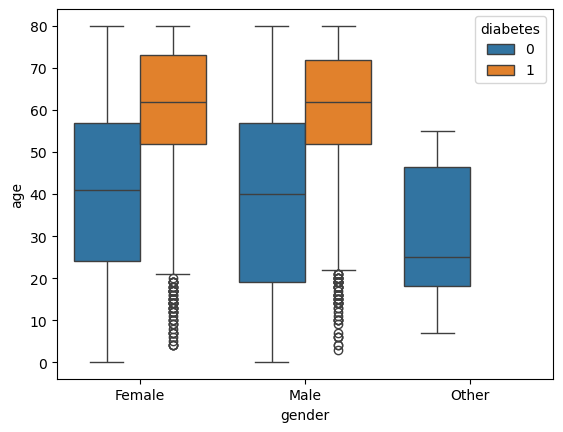

In [12]:
sns.boxplot(diabetes_df, x="gender", y="age", hue="diabetes")
plt.show()

We can see from this boxplot that most diabetetic patients are closer to the 50-70 age mark, regardless of gender. That said, there are multiple outliers that fall under the lower wisker of the diabetes-positive boxplot.

Furthermore, there appear to be no outliers in the upper wisker.

Let's plot scatterplot for age and the target variable.

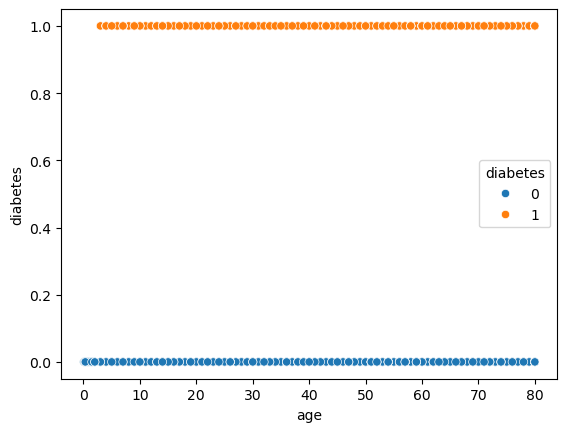

In [13]:
sns.scatterplot(diabetes_df, x="age", y="diabetes", hue="diabetes")
plt.show()

There are many people of all ages without diabetes and many of all ages with diabetes. This specific plot doesn't seem to show much helpful information.

#### Smoking History Attribute Analysis

Let's plot a histogram.

[]

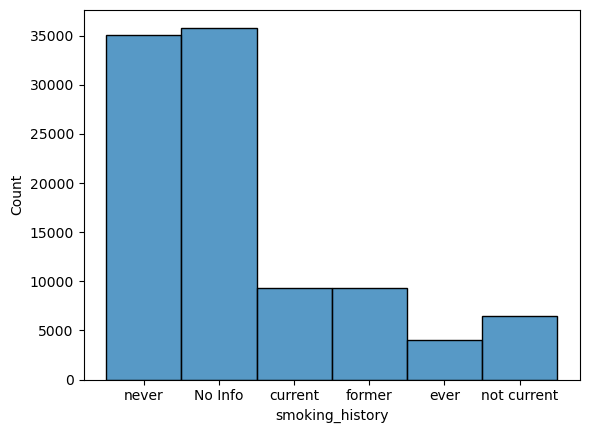

In [14]:
sns.histplot(diabetes_df, x="smoking_history")
plt.plot()

It looks like the vast majority are not smokers. This goes inline with the trend today as fewer and fewer people smoke.

We will plot a more complex count plot to compare each category with the target variable.

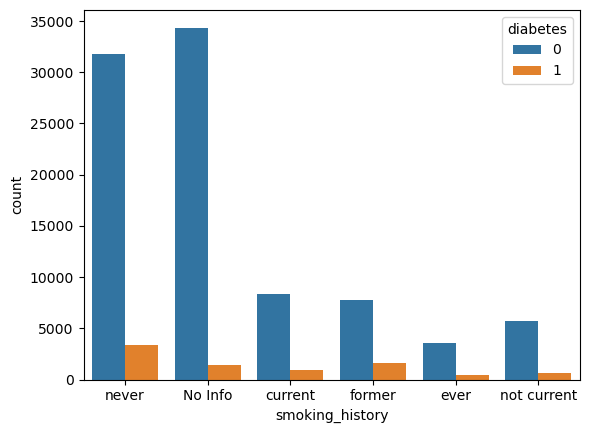

In [15]:
sns.countplot(diabetes_df, x="smoking_history", hue="diabetes")
plt.show()

From this graph, it looks like having vs not having smoking history doesn't have a very strong correlation to having diabetes.

#### Body Mass Index (BMI) Attribute Analysis

Let's plot a histogram.

x

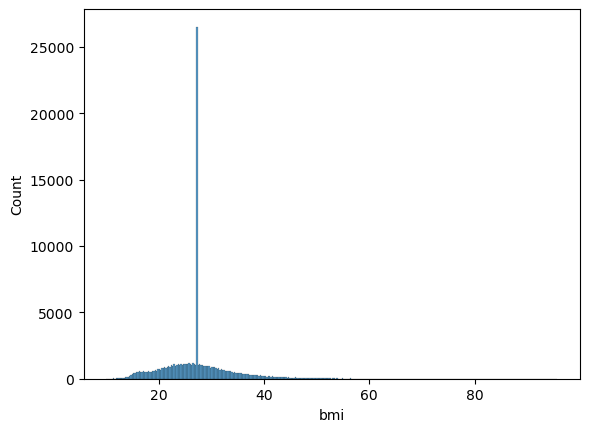

In [16]:
sns.histplot(diabetes_df, x="bmi")
plt.show()

There is clealry a specific value that was probably chosen for quick data collection... That said, this data looks fairly normal. Let us plot this against age and gender.

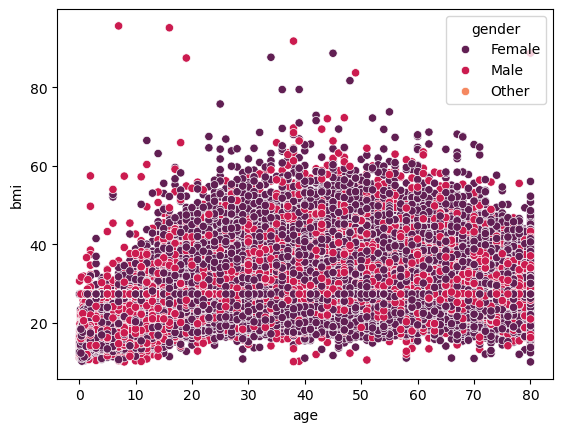

In [17]:
sns.scatterplot(diabetes_df, x="age", y="bmi", hue="gender", palette="rocket")
plt.show()

This is very insightful. There appears to be no correlation with gender. However, we can see a slight increase of BMI between 30 to 60.

Let's see what we can see when we look at diabetes instead.

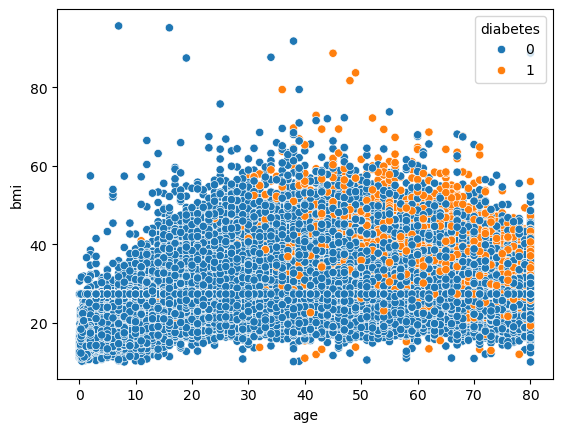

In [18]:
sns.scatterplot(diabetes_df, x="age", y="bmi", hue="diabetes")
plt.show()

Of course, we already knew from the Age analysis that diabetes was higher with age, but it seems BMI also plays a certain role near certain ages. The points in the higher BMI range for their age class seem to be more likely to have diabetes.

Let's plot a scatterplot with BMI and the target variable.

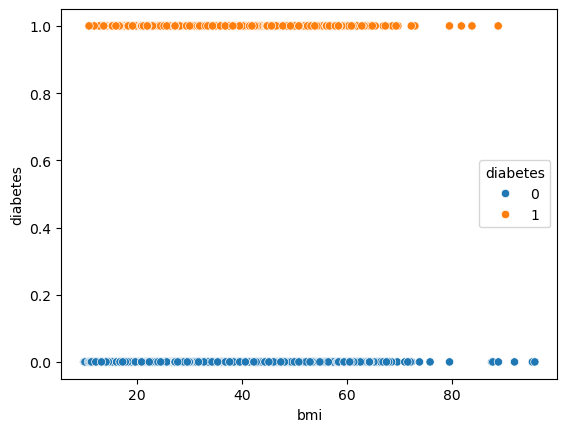

In [19]:
sns.scatterplot(diabetes_df, x="bmi", y="diabetes", hue="diabetes")
plt.show()

There appears to be no correlation.

### HbA1c Level Attribute Analysis

Let's plot a histogram.

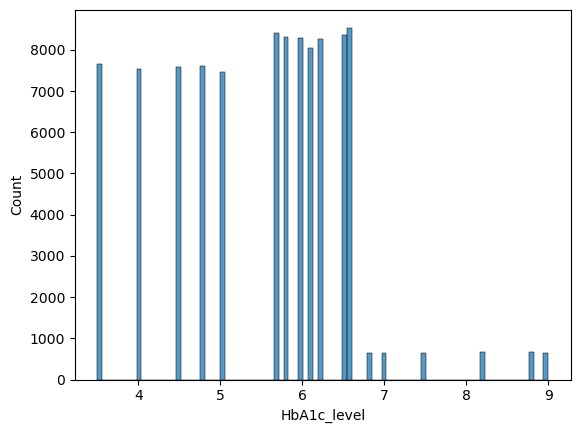

In [20]:
sns.histplot(diabetes_df, x="HbA1c_level")
plt.show()

This looks suspicously like the smoking_plot. Let us plot them against each other to see if there are any correlation.

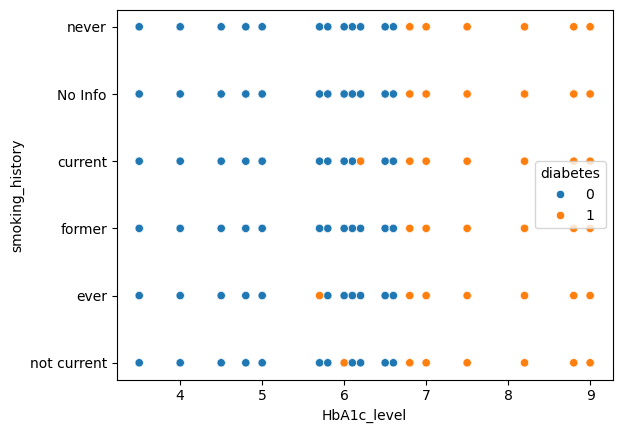

In [21]:
sns.scatterplot(diabetes_df, x="HbA1c_level", y="smoking_history", hue="diabetes")
plt.show()

Nevermind, it appears there is no correlation. However, this does show something quite clearly. High HbA1c level is an indicator of diabetes. Let us plot it against the target variable instead.

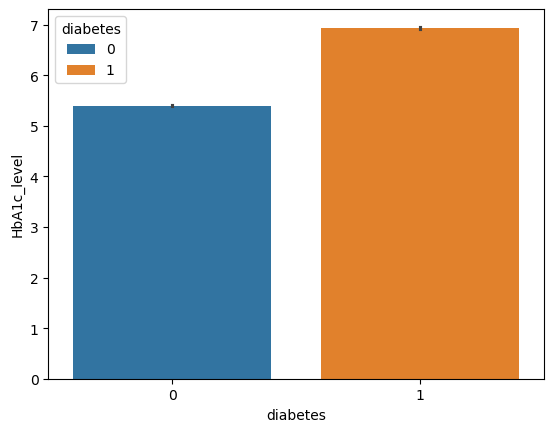

In [22]:
sns.barplot(diabetes_df, x="diabetes", y="HbA1c_level", hue="diabetes")
plt.show()

Clearly, above a HbA1c level of 7, the patient has diabetes. We can see from the previous cell that there are of course some outliers.

We will again plot a scatter plot to see any correlation between the continuous and binary value.

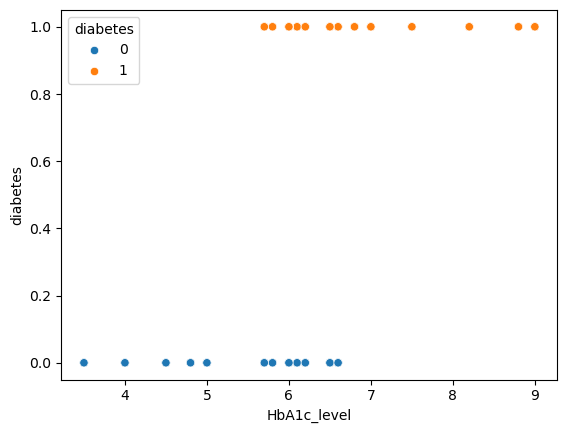

In [23]:
sns.scatterplot(diabetes_df, x="HbA1c_level", y="diabetes", hue="diabetes")
plt.show()

Indeed, it appears that HbA1c level has a logistic curve relation with diabetes.

This makes sense since Hb1Ac is a type of blood-glucose test that shows your average blood-glucose levels in the past 2-3 months before the exam.

Source: [Medline Plus](https://medlineplus.gov/lab-tests/hemoglobin-a1c-hba1c-test/)

#### Blood Glucose Level Attribute Analysis

Let's plot a histogram.

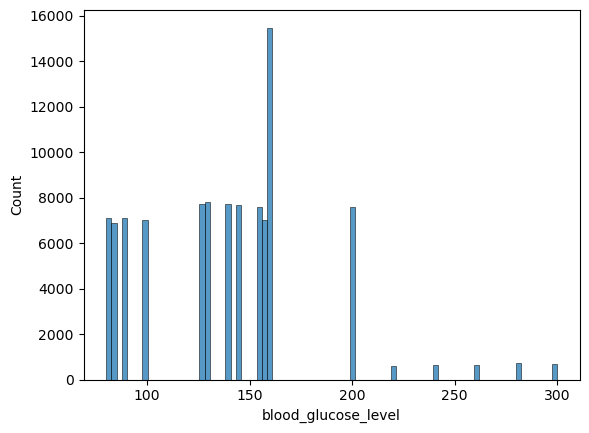

In [24]:
sns.histplot(diabetes_df, x="blood_glucose_level")
plt.show()

Let's try the same scatter plot with blood-glucose level (a test taken showing current blood-glucose levels)

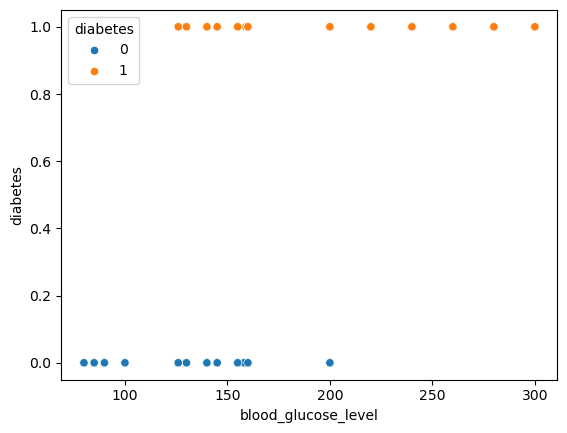

In [25]:
sns.scatterplot(diabetes_df, x="blood_glucose_level", y="diabetes", hue="diabetes")
plt.show()

Likewise, while slightly less, blood-glucose level also has a similar logistic relationship to diabetes. Indeed, this a well-known factor of diabetes.

Let us try to plot HbA1c level against blood-glucose level and highlight diabetes.

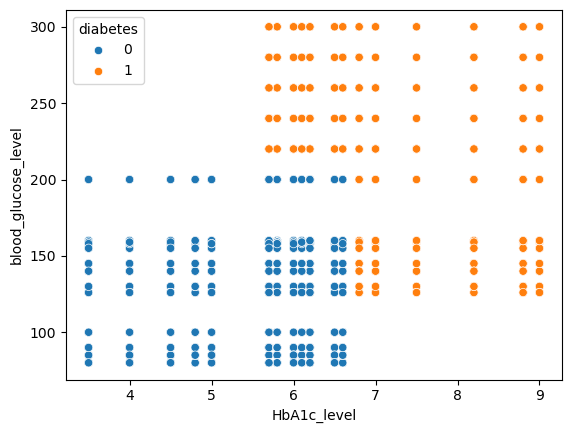

In [26]:
sns.scatterplot(diabetes_df, x="HbA1c_level", y="blood_glucose_level", hue="diabetes")
plt.show()

This is very enriching information. There is a clear correlation between the two variables. This should, however, come as no suprise since both are technically measuring blood-glucose levels, albeit at different times.

3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

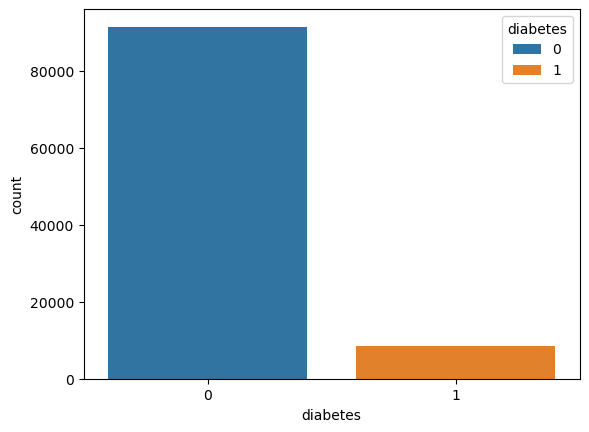

In [27]:
sns.countplot(diabetes_df, x="diabetes", hue="diabetes")
plt.show()

There is a clear imbalance towards non diabetic (0). I suppose this is good... medically speaking?

This could affect the model since it will likely be biased towards the dominant class. To ensure our model is predicting as intented, we will make use of good evaluation metrics that account for imbalances. These include:

- Precision
- Recall
- F1-Score

4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [28]:
# splitting data train and test
diabetes_train, diabetes_test = train_test_split(diabetes_df, test_size=0.2, random_state=42)

# separating features and target variables from train set
X_train = diabetes_train.drop('diabetes', axis=1)
y_train = diabetes_train['diabetes']

# separating features and target variables from test set
X_test = diabetes_test.drop('diabetes', axis=1)
y_test = diabetes_test['diabetes']

## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

There are 2 categorical variables to encode, `gender` and `smoking_history`.

In [29]:
# visualizing training data
diabetes_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
75220,Male,73.0,0,0,former,24.77,3.5,80,0
48955,Male,80.0,0,0,never,24.60,5.7,145,1
44966,Female,38.0,0,0,ever,24.33,4.0,158,0
13568,Female,26.0,0,0,not current,18.87,5.0,100,0
92727,Female,61.0,1,0,current,22.11,4.5,85,0
...,...,...,...,...,...,...,...,...,...
6265,Male,49.0,0,0,never,32.98,5.7,80,0
54886,Female,15.0,0,0,never,28.10,5.0,159,0
76820,Male,42.0,0,0,never,26.14,5.8,85,0
860,Female,37.0,0,0,never,24.96,6.2,158,0


Let's look closer at the values that they contain:

In [30]:
diabetes_train.gender.value_counts(), diabetes_train.smoking_history.value_counts()

(gender
 Female    46786
 Male      33198
 Other        16
 Name: count, dtype: int64,
 smoking_history
 No Info        28667
 never          28065
 former          7510
 current         7383
 not current     5173
 ever            3202
 Name: count, dtype: int64)

We note that `gender` contains generalized values in non-specific order.

However, we can see `smoking_history` has somewhat orderered values. This is the order I have come up with, from least to worse:

1. No Info
2. never
3. ever
4. former
5. not current
6. current

While some of the values have an obvious positioning (e.g., never and current), others are very ambiguous (e.g., not current).

For example, the Gov Canada [page](https://www.canada.ca/en/health-canada/services/health-concerns/tobacco/research/tobacco-use-statistics/terminology.html) on Tobacco Usage Classification defines "ever-smokers" as "current and former smokers combined." From a quick glance in the cell above, we can see this is not the case for this dataset. Regardless, because they are combined this definition would only make sense when counting values from a group, not for classifying individuals.

On the other hand, Wiktionary [defines](https://en.wiktionary.org/wiki/ever-smoker) it as:

> 1. A person who has ever (that is, at any time in their past) smoked tobacco (e.g., cigarettes, cigars, pipes).

> 2. (strictly, operational definition for epidemiology) More precisely, someone who has smoked more than 100 instances (e.g., cigarettes, cigars, pipe bowlfuls) in their lifetime.

As such, given the lower instances in the dataset, I have assumed 'ever' refers to someone who has smoked before at some point their life but does not consider themselves a "smoker" since they have never *actively* smoked.

Note that while this is what I have decided to go with, this is assuming that of all smokers of all time, the number of people who smoked before but never "got into it" is lower, while *most* still smoke (current) and *most* have smoked a lot in their lives (former). This why I have placed 'ever' before 'former.' Someone who is a former smoker, that is, who was once a 'current' or regular smoker, is arguably more at risk than someone who *may* have smoked before, the 'ever.'

There is nothing to back this statement. These are just assumptions I have made.

As for 'not-current', I just assumed this means a current smoker whose last cigarette was smoked a longer interval of time than they are usually capable of. Say, 1 week since they last smoked. That said, they haven't given up smoking for as long as a former smoker, so they're still more of a smoker than a former smoker.

Again, these are all assumptions.

So for gender, we will be using the `OneHotEncoder()` and for smoking_history `OrdinalEncoder()` with the order specified above.

This will be shown in the next question so that they can be put in the same `ColumnTransformer` as the scaler.

Below is the order to be used for smoking history classification.

In [31]:
# categories of smoking_history (from "lowest" to "highest")
smoking_classification_order = [['No Info', 'never', 'ever', 'former', 'not current', 'current']]

6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

Based on our earlier analysis of the variables, I've identified that the best scaler to use is: `RobustScaler`

This is because the most important features identified that correlate the most with the targer variable often have outliers. StandardScaler and MinMax would not do so well with outliers in the dataset. Features that are already normal won't be affected too much by the RobustScaler transformation.

Furthermore, while it is possible to apply different transformations that fit each feature best, this would not be good for the kinds of models we will be fitting the data to. Since we will be using KNN and Logistic Regression which are both models sensitive to ranges, it is best to ensure all features are transformed with the same transformation.

For this reason, we will be using RobustScaler.


In [32]:
# column transformer to apply encoding and scaling
full_pipeline = ColumnTransformer([
    ("onehot", OneHotEncoder(), ['gender', 'hypertension', 'heart_disease']),
    ('ord', OrdinalEncoder(categories=smoking_classification_order), ['smoking_history']),
    ('scal', RobustScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])
])


## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In the code below, we create a pipeline for each model. Each pipeline takes in the previous transformer pipeline we described in the cell above and follows it with the estimator. For now, we've given it some standard values for the model parameters.

In [33]:
# pipeline for Decision Tree Classifier
tree_pipeline = Pipeline(steps=[
    ('preprocessor',full_pipeline),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# pipeline for K-Neighbours Classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# pipeline for Logistic Regression
logic_pipeline = Pipeline(steps=[
    ('preprocessor',full_pipeline),
    ('classifier',LogisticRegression(random_state=42, max_iter=200))
])

8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    - Assess the models using metrics such as precision, recall, and F1-score.

For our cross-validation task, we will be implementing a Stratified K Fold approach. Instead of just providing a K fold number, Stratified K Folds ensures that the data splits conform to the same class proportion of the original dataset. This is helpful in cases where the dataset has a class imbalance, as we saw from the target variable analysis.

In essence, it ensures a more "original-like" data split will be used to train each fold, more accurately reflecting the original data.

In addition, we have chosen 10 splits because higher splits ensure more chances for the minority class to be included in the data splits.

Helper function generated by ChatGPT for formatting metrics' results. The function was modifyed slightly to make up for misaligned texts, despite chat's best efforts.

In [34]:
# generated by ChatGPT, function for printing formatted dictionnary values
def metric_classification(scores_dict):
     # Extract the keys and their corresponding values from the dictionary
    keys = scores_dict.keys()
    values = [scores_dict[key] for key in keys]

    # Get the number of folds based on the length of the first metric's array
    num_folds = len(values[0])

    # Print the header for folds
    fold_header = "Fold\t\t\t" + "\t".join([str(i + 1) for i in range(num_folds)])
    print(fold_header)
    print("-" * 10)  # Adjusted line length based on header

    # Get the maximum length of the keys for formatting
    max_key_length = max(len(key) for key in keys)

    # Print each metric
    for key, value in zip(keys, values):
        # Format the output for each metric
        formatted_values = "\t".join([f"{v:.4f}" for v in value])  # Format values to 4 decimal places
        # Adjust alignment using max_key_length
        print(f"{key+':'.ljust(max_key_length)}\t{formatted_values}")


Performing cross-validation on the 3 different modes. This evaluates for the three metrics:
- precision_macro
- recall_macro
- f1_macro


Saving scoring metrics since all same metrics are used for all methods. Helps keeps code cleaner when calling the cross-validation function.

In [35]:
# tuple with scoring metrics
    # to be used multiple times in CV and grid search
scoring_metrics = ('precision_macro', 'recall_macro', 'f1_macro')



It was decided to use the "_macro" suffixed metric as it gives equal weight to all classes, which is very important in this imbalanced categorical target variable dataset.

In [36]:
# performing cross validation on Decision Tree Classifier
tree_scores = cross_validate(tree_pipeline, X_train, y_train, cv=StratifiedKFold(n_splits=10),
                                scoring=scoring_metrics)

# performing cross validation on KNeighbour Classifier
knn_scores = cross_validate(knn_pipeline, X_train, y_train, cv=StratifiedKFold(n_splits=10),
                                scoring=scoring_metrics)

# performing cross validation on Logistic Regression
logic_scores = cross_validate(logic_pipeline, X_train, y_train, cv=StratifiedKFold(n_splits=10),
                                scoring=scoring_metrics)


The code above is essentially training the model 10 times across "stratified" (class balanced) folds and registering 'precision_macro' 'recall_macro' and 'f1_macro' for each.

They each return dictionaries with arrays length 10 with data for each of the 10 folds.

In [37]:
# printing evaluation metrics for cross-validation

print("#### DecisionTreeClassifier Cross-Validation Metrics ####\n")
metric_classification(tree_scores)
print("\n#### KNeighbor Classifier Cross-Validation Metrics ####\n")
metric_classification(knn_scores)
print("\n#### Logistic Regression Classifier Cross-Validation Metrics ####\n")
metric_classification(logic_scores)

#### DecisionTreeClassifier Cross-Validation Metrics ####

Fold			1	2	3	4	5	6	7	8	9	10
----------
fit_time:                   	0.2723	0.3205	0.2834	0.3647	0.2800	0.2695	0.2702	0.2750	0.2833	0.2561
score_time:                   	0.0301	0.0259	0.0306	0.0251	0.0259	0.0250	0.0248	0.0314	0.0248	0.0272
test_precision_macro:                   	0.8367	0.8417	0.8340	0.8425	0.8291	0.8444	0.8514	0.8271	0.8365	0.8374
test_recall_macro:                   	0.8381	0.8639	0.8614	0.8584	0.8440	0.8664	0.8631	0.8458	0.8556	0.8509
test_f1_macro:                   	0.8374	0.8523	0.8470	0.8502	0.8363	0.8550	0.8571	0.8361	0.8457	0.8440

#### KNeighbor Classifier Cross-Validation Metrics ####

Fold			1	2	3	4	5	6	7	8	9	10
----------
fit_time:                   	0.1917	0.2012	0.1982	0.1812	0.1747	0.1543	0.1664	0.1567	0.1570	0.1678
score_time:                   	0.8180	0.9039	1.0420	1.0272	0.9145	1.0173	0.8530	0.9087	0.9283	0.8091
test_precision_macro:                   	0.9292	0.9304	0.9145	0.9264	0.9141	0.9303

For the last three items ('test_precision_macro' etc.), the higher the value, the better.

We can see that the model with the best overall results is the DecisionTreeClassifier. That said, KNN and Logit seem to contain the highest-value metrics for 'precision'. For precision, this means that out of all the guesses guessed as 'positive', they get more of them right, than the decision tree for example. However, with higher recall in the decision tree, it means that it's classifying more true positives, misclassifying negatives less often. Essentially, one is measuring the model's "positive guessing" accuracy, while the other measures what it actually gets right.

That said, the decision tree's higher recall is likely due its ability to fit the most common class (the 'negative') well. This means that it will less likely classify False Negatives, since it can more easily idenfity the 'negative' class which is more common in this dataset.

The other models' high precision indicates that they're getting many of their positive guesses correctly.

Let's take a look at the predictions without cross-validation to compare how much better we did using cross-validation.

In [38]:
# fitting model on data
tree_pipeline.fit(X_train,y_train)

# fitting model on data
knn_pipeline.fit(X_train,y_train)

# fitting model on data
logic_pipeline.fit(X_train,y_train)

# running predictions without cross-validation
y_predDtree = tree_pipeline.predict(X_train)
y_predKNN = knn_pipeline.predict(X_train)
y_predLR = logic_pipeline.predict(X_train)


In [39]:

# printing evaluation metrics without cross-validation
print("Evaluation for Decision Trees:")
print(classification_report(y_train, y_predDtree))
print("Evaluation for KNN:")
print(classification_report(y_train, y_predKNN))
print("Evaluation for Logistic Regression:")
print(classification_report(y_train, y_predLR))

Evaluation for Decision Trees:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     73208
           1       1.00      0.99      1.00      6792

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

Evaluation for KNN:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     73208
           1       0.94      0.67      0.79      6792

    accuracy                           0.97     80000
   macro avg       0.96      0.83      0.88     80000
weighted avg       0.97      0.97      0.97     80000

Evaluation for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     73208
           1       0.87      0.63      0.73      6792

    accuracy                           0.96     80000
   macro avg       0.92      0.81      0.

We can clealry see that the decision tree here is probably terribly overfitting the data. The other models also seemt to be doing so, but more for the negative class (since it's imbalanced towards that class). However, recall is much worse for KNN and Logit. They both appear to be misclassiying many positives as negatives.

**Note:** Values from CV are likely for '1', whereas the metrics w/o cross-validation show 0 and 1. However, given how heavily imbalanced the dataset is towards '0', it is no surprise that '0' has such high metrics. It will naturally predict this value most accurately since it's what occurs most often in the dataset.

The F1 scores clearly reflect the misclassification of KNN and Logit.

## Hyperparameter Optimization

9. **Exploration and Performance Evaluation:**

    - Investigate the impact of varying hyperparameter values on the performance of each model.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Display the results in a tabular or graphical format (e.g., line charts, bar charts) to effectively demonstrate the influence of hyperparameter variations on model performance.

    - Specify the default values for each hyperparameter tested.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

#### Decision Tree Grid Search

**Criterion**\
Both Gini and Entropy measure node "impurity." That is, whether the resultant nodes from each node split contains more nodes from a certain class. If say, in the left nodes there are 65 A and 5 B and in the right nodes 40 A and 30 B, then the left split is more pure than the right, since there's a higher "concentration" of one class. So the algorithm will pick the left, split them and repeat. Of course, this can be problematic with imbalanced datasets, since it will tend to the more common class. But this is just how Decision Tree algorithms work.

While both produce similar trees, Gini is typically faster since it does not require logarithmic calculation. We will test them both for the sake of testing.

**Max Depth**\
We have chosen these values since they cover shallow trees (3), medium (5) to complex trees (10), and likely overfitting trees (20). By testing exaggerated (likely poor) values, we can have a good idea of what best fits the model.

We will now perform grid search using the parameters listed in the previous cell.

Note: From testing, we've identified that 10 folds yields about the same results as 5. So it has been changed to 5.

In [40]:
tree_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 10, 20]
}

# performing grid search with the Decision Tree Classifier
tree_grid_search = GridSearchCV(tree_pipeline, tree_param_grid, cv=5, scoring=scoring_metrics, return_train_score=True, refit='f1_macro')

# fitting on training data
tree_grid_search.fit(X_train, y_train);

#### K Nearest Neighbors Grid Search

**N Neighbors:** Low number can overfit the data, but too high can underfit. 1 is generally low and 10 is high. We picked some values in between to see what works best.

**Weights:** Uniform gives the same importance to all points, while distance gives more importance to closer neighbours. We will try all values since there are only few options to choose from.

In [41]:
# KNN parameter grid
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 10], #50 is for test
    'classifier__weights': ['uniform', 'distance', None]
}

knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring=scoring_metrics, return_train_score=True, refit='f1_macro')
knn_grid_search.fit(X_train, y_train);

#### Logistic Regression Grid Search

**Penalty:**
We will be using 'l2' compared to None. L2 (Ridge regularization) helps prevent overfitting.

**Maximum Iterations:**
We will try different higher values in case the model does not converge with the loss function.

**Tolerance:**
Indication for stopping. When the loss function is less than this value, the solver stops. We give 3 values so that it can find a middle ground (if it stops at 1e-3), or show that it can go further/lower if it prefers 1e-4 or 1e-2.


In [42]:
# ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty
# Not using l1
logic_param_grid = {
    'classifier__penalty': ['l2', None],
    'classifier__max_iter': [100, 200, 500, 10000],
    'classifier__tol': [1e-4, 1e-3, 1e-2]
}

logic_grid_search = GridSearchCV(logic_pipeline, logic_param_grid, cv=5, scoring=scoring_metrics, return_train_score=True, refit='f1_macro')
logic_grid_search.fit(X_train, y_train);

/Users/matsuruhoshi/opt/anaconda3/envs/intro-to-ai/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#### Comparing Cross-Validation Results

In [43]:
print(tree_grid_search.estimator.named_steps['classifier'])

DecisionTreeClassifier(random_state=42)


In [44]:
def show_hyperparameter_results(grid_search):
    print("-" * 100)
    print("\n{} Hyperparameter Results:".format(grid_search.estimator.named_steps['classifier']))
    print("Best F1 Score: ", grid_search.best_score_)
    print("Precision Macro:", grid_search.cv_results_["mean_test_precision_macro"])
    print("Recall Macro:", grid_search.cv_results_["mean_test_recall_macro"])
    print("Best Params: ", grid_search.best_params_)    

In [45]:
# printing hyperparameter results
show_hyperparameter_results(tree_grid_search)
show_hyperparameter_results(knn_grid_search)
show_hyperparameter_results(logic_grid_search)

----------------------------------------------------------------------------------------------------

DecisionTreeClassifier(random_state=42) Hyperparameter Results:
Best F1 Score:  0.8930293600479832
Precision Macro: [0.98505264 0.98505264 0.9710785  0.86999535 0.98505264 0.98505264
 0.9747242  0.8910053 ]
Recall Macro: [0.83392227 0.83392227 0.83909028 0.85237915 0.83392227 0.83392227
 0.83867341 0.84944992]
Best Params:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 10}
----------------------------------------------------------------------------------------------------

KNeighborsClassifier() Hyperparameter Results:
Best F1 Score:  0.8490191409696786
Precision Macro: [0.90157239 0.8855618  0.90157239 0.92648502 0.91168967 0.92648502
 0.93978766 0.92750258 0.93978766 0.961505   0.94039099 0.961505  ]
Recall Macro: [0.8064161  0.80890249 0.8064161  0.79866873 0.80341593 0.79866873
 0.79348904 0.79700446 0.79348904 0.77850131 0.79179052 0.77850131]
Best Params:  {'class

the function converts the results the cv_results from a cross_validation process into a more useable Pandas dataframe format. First of all, it create a dictionary containg all the results like model parameter, recall, and f1-score etc. Then, converts it to the dataframe. The key will become the columns and the elements are the rows. The param_df contains the hyperparameter from the dictiontary. Lastly, we concatenate the parameters and metrics to form the dataframe. This format make it easier to analyze the results.
  

In [46]:
# chatGPT function to turn cv_results_ into a Pandas Dataframe
def extract_cv_results(cv_results_):
    data = {
        'params': cv_results_['params'],
        'mean_test_recall_macro': cv_results_['mean_test_recall_macro'],
        'mean_test_precision_macro': cv_results_['mean_test_precision_macro'],
        'mean_test_f1_macro': cv_results_['mean_test_f1_macro']
    }

    df = pd.DataFrame(data)

    param_df = pd.DataFrame(df['params'].tolist())
    final_df = pd.concat([param_df, df.drop(columns='params')], axis=1)

    return final_df


Here we are making use of our dataframe-making helper function.

In [47]:
# saving decision tree grid seach results as Pandas dataframe 
tree_grid_search_df = extract_cv_results(tree_grid_search.cv_results_)

# saving KNN grid seach results as Pandas dataframe 
knn_grid_search_df = extract_cv_results(knn_grid_search.cv_results_)

# saving logistic regression grid seach results as Pandas dataframe 
logic_grid_search_df = extract_cv_results(logic_grid_search.cv_results_)

Decision Tree

In [48]:
tree_grid_search_df.head(5)

,classifier__criterion,classifier__max_depth,mean_test_recall_macro,mean_test_precision_macro,mean_test_f1_macro
0,gini,3,0.833922,0.985053,0.892828
1,gini,5,0.833922,0.985053,0.892828
2,gini,10,0.839090,0.971079,0.892157
3,gini,20,0.852379,0.869995,0.860900
4,entropy,3,0.833922,0.985053,0.892828


Plotting the metrics for decision tree with different max depth




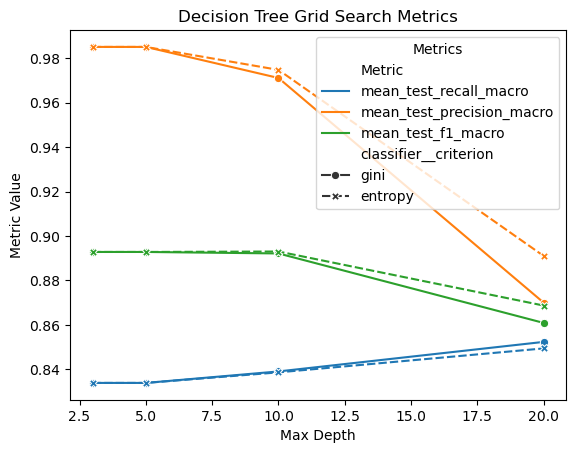

In [49]:
tree_grid_search_melted = tree_grid_search_df.melt(
    id_vars=["classifier__max_depth", "classifier__criterion"],
    value_vars=["mean_test_recall_macro", "mean_test_precision_macro", "mean_test_f1_macro"],
    var_name="Metric",
    value_name="Value"
)

sns.lineplot(
    data=tree_grid_search_melted,
    x="classifier__max_depth",
    y="Value",
    hue="Metric",
    style="classifier__criterion",
    markers=True
)

plt.title("Decision Tree Grid Search Metrics")
plt.xlabel("Max Depth")
plt.ylabel("Metric Value")
plt.legend(title="Metrics")
plt.show()

KNN Grid Search Metrics table and plot

In [50]:
knn_grid_search_df.head(5)

,classifier__n_neighbors,classifier__weights,mean_test_recall_macro,mean_test_precision_macro,mean_test_f1_macro
0,3,uniform,0.806416,0.901572,0.846052
1,3,distance,0.808902,0.885562,0.841923
2,3,None,0.806416,0.901572,0.846052
3,5,uniform,0.798669,0.926485,0.848860
4,5,distance,0.803416,0.911690,0.847473


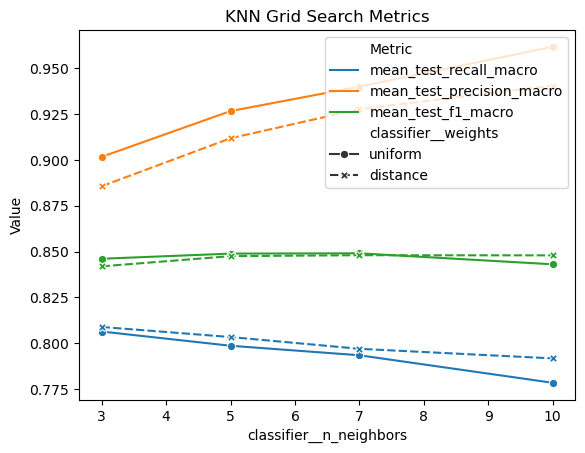

In [51]:
knn_grid_search_melted = knn_grid_search_df.melt(
    id_vars= ["classifier__n_neighbors", "classifier__weights"],
    value_vars= ["mean_test_recall_macro", "mean_test_precision_macro", "mean_test_f1_macro"],
    var_name = "Metric",
    value_name = "Value"
)

sns.lineplot(knn_grid_search_melted, x="classifier__n_neighbors", y="Value", hue="Metric", style="classifier__weights", markers = True)
plt.title("KNN Grid Search Metrics")
plt.show()

Logic Grid Search Metrics table and plot

In [52]:
logic_grid_search_df.head(5)

,classifier__max_iter,classifier__penalty,classifier__tol,mean_test_recall_macro,mean_test_precision_macro,mean_test_f1_macro
0,100,l2,0.0001,0.809093,0.917896,0.853559
1,100,l2,0.0010,0.811139,0.917322,0.854778
2,100,l2,0.0100,0.803448,0.918609,0.849830
3,100,None,0.0001,0.809367,0.917713,0.853686
4,100,None,0.0010,0.811353,0.917295,0.854917


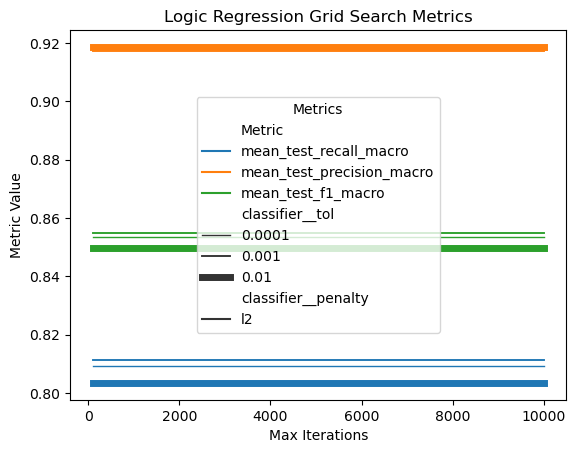

In [53]:
logic_grid_search_melted = logic_grid_search_df.melt(
    id_vars=["classifier__max_iter", "classifier__tol", "classifier__penalty"],
    value_vars=["mean_test_recall_macro", "mean_test_precision_macro", "mean_test_f1_macro"],
    var_name="Metric",
    value_name="Value"
)

sns.lineplot(
    data=logic_grid_search_melted,
    x="classifier__max_iter",
    y="Value",
    hue="Metric",
    style="classifier__penalty",
    size="classifier__tol",
    sizes=(1, 5)
)
plt.title("Logic Regression Grid Search Metrics")
plt.xlabel("Max Iterations")
plt.ylabel("Metric Value")
plt.legend(title="Metrics")
plt.show()

## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

#### Comparison of Results

**Decision Tree:**

- Recall: 0.8394
- Precision: 0.9559
- F1 Score: 0.8858

The Decision Tree model performs the best in terms of precision and F1 score, with a precision of 0.9559, indicating that when the model makes a positive prediction, it's more likely to be correct compared to the other models. The high precision is a sign of fewer false positives.

However, the recall (0.8394) is slightly lower compared to Logistic Regression. This may indicate that the Decision Tree model misses a few positive instances, possibly due to overfitting, which is common with deep trees that memorize the training data but struggle with generalizing to unseen data.

**K-Nearest Neighbors (KNN):**

- Recall: 0.7963
- Precision: 0.9270
- F1 Score: 0.8466

KNN has the lowest scores across the board, particularly in recall (0.7963). This suggests that KNN is less effective in correctly identifying all positive instances, which may be due to the simplicity of the model and its sensitivity to noisy data or data imbalance.

KNN performs reasonably well in precision (0.9270), but its lower recall suggests it may not be the best choice when the goal is to minimize false negatives.

**Logistic Regression:**

- Recall: 0.8080
- Precision: 0.9178
- F1 Score: 0.8527

Logistic Regression strikes a balance between recall and precision, achieving a recall of 0.8080 and precision of 0.9178. This model is less likely to miss positive cases compared to KNN and is better at balancing false positives and false negatives.

The F1 score (0.8527) is slightly lower than that of Decision Tree but is still respectable. Logistic Regression's strength comes from its simplicity and ability to generalize well, which reduces the risk of overfitting compared to more complex models like Decision Trees.



#### Potential Explanations for Performance Differences

**Model Complexity**

Decision Trees are prone to overfitting, especially when they become deep and capture noise from the training data. The high precision but lower recall of the Decision Tree suggests that it is better at correctly identifying the true positives but may miss some positive instances (false negatives).

KNN is a simpler model that can struggle with large datasets and data imbalance. Since KNN's performance is tied to the structure of the dataset and proximity of data points, it tends to perform poorly when the data is noisy or high-dimensional.

Logistic Regression is a linear model that generalizes well and can handle imbalanced datasets effectively. Its performance in recall and precision suggests it is a more balanced and robust model, avoiding the pitfalls of overfitting.

**Data Imbalance**

Data imbalance might favor models like Logistic Regression, which can handle it better by adjusting decision thresholds. 

The lower recall in KNN might be a sign that the model struggles with minority class detection.

The Decision tree may also have learned the majority class well, hence its high precision, but struggles with the minority class, resulting in lower recall.

**Overfitting**

Decision Trees tend to overfit, especially without pruning or controlling the depth, leading to high precision but potential drops in generalization ability, as seen in its lower recall.

KNN may also overfit if too many neighbors are considered or if the data is noisy.

Logistic Regression, being a simpler linear model, tends to overfit less, which might explain its more balanced recall and precision.

**Parameter Tuning**

The parameter tuning process (e.g., adjusting the depth of the tree or the number of neighbors in KNN) has a significant impact. In this case, Decision Tree with a properly tuned max_depth performed well, but its complexity still led to a trade-off between recall and precision.



#### Recommendations

**Best Overall Model**

Decision Tree provides the best performance in terms of F1 score and precision. It might be the best choice if precision is the key metric of interest (e.g., in scenarios where false positives are costly). However, its lower recall suggests it may miss some positive cases, so caution is needed if recall is critical.

In [55]:
tree_grid_search_df['Model'] = 'Decision Tree'
knn_grid_search_df['Model'] = 'KNN'
logic_grid_search_df['Model'] = 'Logistic Regression'

combined_df = pd.concat([tree_grid_search_df, knn_grid_search_df, logic_grid_search_df], ignore_index=True)

combined_melted = combined_df.melt(
    id_vars=["Model", "classifier__max_depth", "classifier__n_neighbors", "classifier__criterion", "classifier__penalty"],
    value_vars=["mean_test_recall_macro", "mean_test_precision_macro", "mean_test_f1_macro"],
    var_name="Metric",
    value_name="Value"
)

summary_table = combined_df.groupby('Model')[['mean_test_recall_macro', 'mean_test_precision_macro', 'mean_test_f1_macro']].mean()

summary_table.columns = ['Mean Recall (Macro)', 'Mean Precision (Macro)', 'Mean F1 Score (Macro)']

formatted_summary_table = summary_table.style.format({
    'Mean Recall (Macro)': '{:.4f}',
    'Mean Precision (Macro)': '{:.4f}',
    'Mean F1 Score (Macro)': '{:.4f}'
}).set_caption('Model Comparison Summary').background_gradient(cmap='Blues')

formatted_summary_table




,Mean Recall (Macro),Mean Precision (Macro),Mean F1 Score (Macro)
Model,,,
Decision Tree,0.8394,0.9559,0.8858
KNN,0.7963,0.9270,0.8466
Logistic Regression,0.8080,0.9178,0.8527


#### Final Model with Test Data

In [56]:
# saving final estimator
final_model = tree_grid_search.best_estimator_

# will transform X_test and predict values
    # behaves like this since GridSearch CV was performed with pipeline
final_predictions = final_model.predict(X_test)

Analysising final model results

In [57]:
# displays recall, precision, and f1 metrics for data
print(classification_report(y_test, final_predictions)) 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



## 2. Documentation of Exploratory Analysis

The report should comprehensively document the entire process followed during this assignment. The Jupyter Notebook must include the following:

- Your name(s), student number(s), and a report title.
- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes?
- A section for each step of the exploratory analysis, containing the relevant Python code and explanations or results.
  - For sections requiring Python code, include the code in a cell.
  - For sections requiring explanations or results, include these in a separate cell or in combination with code cells.
- Ensure logical separation of code into different cells. For example, the definition of a function should be in one cell and its execution in another. Avoid placing too much code in a single cell to maintain clarity and readability.
- The notebook you submit must include the results of the execution, complete with graphics, ensuring that the teaching assistant can grade the notebook without needing to execute the code.

# Resources

Environment Setup
- https://anaconda.org/anaconda/seaborn

Data Analysis
- https://www.canada.ca/en/health-canada/services/health-concerns/tobacco/research/tobacco-use-statistics/terminology.html
- https://en.wiktionary.org/wiki/ever-smoker

Scikit Learn:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
- https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
- https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html

